In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
taxifile = "../New-York-Transportation/Raw Data/Taxi_10-Jul_18.csv"
taxi_data = pd.read_csv

In [103]:
uberfile = "../New-York-Transportation/Raw Data/Uber_15-Aug_18.csv"
uber_data = pd.read_csv(uberfile)
uber_data = uber_data[uber_data['Years']!=2018]
uber_data = uber_data.rename(columns={"Pickup Start Date":"Start Date"})
#uber_data

In [117]:
uber_data15 = uber_data[uber_data['Years']==2015].sort_values(by='Start Date').reset_index(drop=True)
uber_data15 = uber_data15.groupby(uber_data15['Start Date']).sum().reset_index(drop=False)
uber_data15['Month'] = uber_data15['Start Date'].str[:2]
uber_grouped15 = uber_data15.groupby(uber_data15['Month']).sum()
#uber_grouped15

In [119]:
uber_data16 = uber_data[uber_data['Years']==2016].sort_values(by='Start Date').reset_index(drop=True)
uber_data16 = uber_data16.groupby(uber_data16['Start Date']).sum().reset_index(drop=False)
uber_data16['Month'] = uber_data16['Start Date'].str[:2]
uber_grouped16 = uber_data16.groupby(uber_data16['Month']).sum()
#uber_grouped16

In [134]:
uber_data17 = uber_data[uber_data['Years']==2017].sort_values(by='Start Date').reset_index(drop=True)
uber_data17 = uber_data17[uber_data17['Week Number']<14].groupby(uber_data17['Start Date']).sum().reset_index(drop=False)
uber_data17['Month'] = uber_data17['Start Date'].str[:2]
uber_grouped17 = uber_data17.groupby(uber_data17['Month']).sum()
#uber_grouped17

In [133]:
target_uber_data = uber_grouped15.append(uber_grouped16).append(uber_grouped17)
target_uber_grouped = target_uber_data.reset_index(drop=False)
target_uber_grouped

,Month,Wave Number,Years,Week Number,Total Dispatched Trips,Unique Dispatched Vehicle
0,01,30,60450,90,1871075,52175
1,02,24,48360,180,2178305,47744
2,03,32,62465,371,2548014,62564
3,04,24,48360,396,2132743,53459
4,05,34,56420,594,2290813,60038
5,06,56,64480,816,2563019,70205
6,07,56,64480,944,2909997,74977
7,08,116,104780,1792,3743067,100739
8,09,261,173290,3314,3649323,88966
9,10,303,189410,4001,3867162,94854


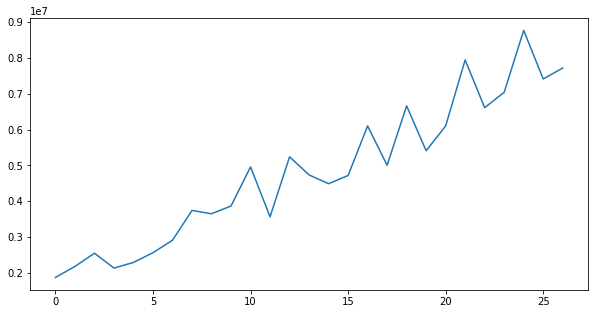

In [132]:
plt.figure(figsize=(10,5))
plt.plot(target_uber_grouped.index.values, target_uber_grouped['Total Dispatched Trips'])